---
---
# Regression Loss Functions
---
---

## Libraries Import

In [1]:
import tensorflow as tf
from keras.datasets import boston_housing
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

## Loading Data

In [15]:
# Load the Boston housing dataset
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

# standardize dataset
std = StandardScaler()
X_train_scaled = std.fit_transform(X_train)
X_test_scaled = std.transform(X_test)

print("Data loaded and normalized.")

Data loaded and normalized.


## Modeling

In [16]:
# Define the model to use to test and compare the different loss functions
def build_model(loss_function):
    model = Sequential([
        Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss=loss_function, metrics=['mae'])
    return model

### Mean Squared Error (MSE)

This loss function calculates the average of the squares of the differences between the actual and predicted values. It's very sensitive to outliers as the errors are squared before they are averaged, which gives a larger error.


In [17]:
model_mse = build_model('mean_squared_error')
history = model_mse.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=1, verbose=1)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 563.6176 - mae: 21.3289 - val_loss: 192.2969 - val_mae: 11.7343
Epoch 2/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 112.4335 - mae: 7.9557 - val_loss: 49.6308 - val_mae: 5.3770
Epoch 3/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 40.6945 - mae: 4.0528 - val_loss: 31.5009 - val_mae: 4.2292
Epoch 4/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 42.1266 - mae: 3.9695 - val_loss: 25.6895 - val_mae: 3.8844
Epoch 5/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 21.6970 - mae: 3.2696 - val_loss: 23.1058 - val_mae: 3.6859
Epoch 6/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.3982 - mae: 3.0140 - val_loss: 21.8971 - val_mae: 3.5432
Epoch 7/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 17.0382 - mae: 2.9182 - val_loss: 20.2971 - val_mae: 3.4211
Epoch 8/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 13.5963 - mae: 2.7323 - val_loss: 20.8260 - val_mae: 3.4144
Epoch 9/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms

In [5]:
# evaluate the model
train_mse = model_mse.evaluate(X_train_scaled, y_train, verbose=0)
test_mse = model_mse.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mse[1], test_mse[1]))

Train: 2.390, Test: 3.221


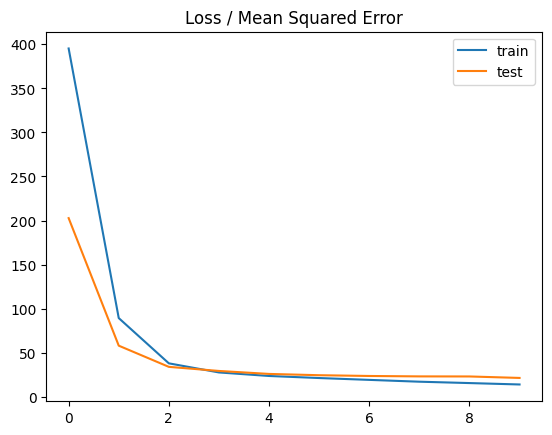

In [ ]:
# plot loss during training
plt.title('Loss / Mean Squared Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Mean Absolute Error (MAE)
MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

In [6]:
model_mae = build_model('mean_absolute_error')
history = model_mae.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=1, verbose=1)

Epoch 1/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 19.6597 - mae: 19.6597 - val_loss: 8.8986 - val_mae: 8.8986
Epoch 2/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5.9212 - mae: 5.9212 - val_loss: 5.1212 - val_mae: 5.1212
Epoch 3/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.1935 - mae: 4.1935 - val_loss: 4.2007 - val_mae: 4.2007
Epoch 4/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.2898 - mae: 3.2898 - val_loss: 3.7189 - val_mae: 3.7189
Epoch 5/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1306 - mae: 3.1306 - val_loss: 3.5127 - val_mae: 3.5127
Epoch 6/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.1582 - mae: 3.1582 - val_loss: 3.4094 - val_mae: 3.4094
Epoch 7/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.9788 - mae: 2.9788 - val_loss: 3.2033 - val_mae: 3.2033
Epoch 8/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.5566 - mae: 2.5566 - val_loss: 3.1095 - val_mae: 3.1095
Epoch 9/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - 

In [7]:
# evaluate the model
train_mae = model_mae.evaluate(X_train_scaled, y_train, verbose=0)
test_mae = model_mae.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mae[1], test_mae[1]))

Train: 2.281, Test: 2.850


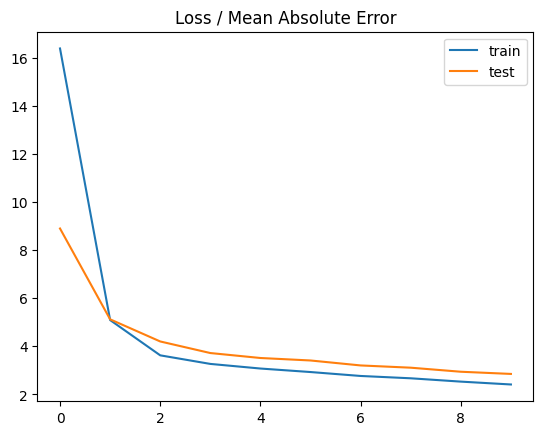

In [8]:
# plot loss during training
plt.title('Loss / Mean Absolute Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

### Mean Absolute Percentage Error (MAPE)
MAPE expresses accuracy as a percentage, and is calculated as the average absolute percent difference between predicted and actual values for each instance.

In [9]:
model_mape = build_model('mean_absolute_percentage_error')
history = model_mape.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=1, verbose=1)

Epoch 1/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 86.7471 - mae: 19.8847 - val_loss: 47.0332 - val_mae: 11.1885
Epoch 2/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 32.5599 - mae: 7.7350 - val_loss: 28.6323 - val_mae: 5.7845
Epoch 3/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 20.3393 - mae: 4.8427 - val_loss: 23.2224 - val_mae: 4.7152
Epoch 4/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 16.3430 - mae: 3.8262 - val_loss: 20.3603 - val_mae: 4.1418
Epoch 5/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.8647 - mae: 3.5138 - val_loss: 18.8325 - val_mae: 3.8239
Epoch 6/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 14.9521 - mae: 3.6004 - val_loss: 17.6173 - val_mae: 3.6287
Epoch 7/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.8261 - mae: 3.1653 - val_loss: 17.7575 - val_mae: 3.5808
Epoch 8/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 13.4224 - mae: 3.0715 - val_loss: 16.5194 - val_mae: 3.3816
Epoch 9/10
404/404 ━━━━━━━━━━━━━━━━━━━

In [12]:
# evaluate the model
train_mape = model_mape.evaluate(X_train_scaled, y_train, verbose=0)
test_mape = model_mape.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_mape[1], test_mape[1]))

Train: 2.491, Test: 3.304


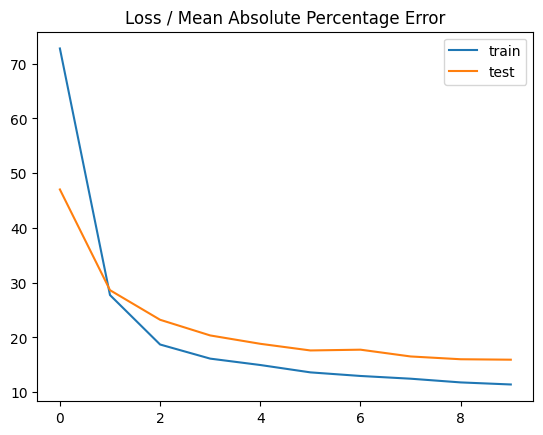

In [13]:
# plot loss during training
plt.title('Loss / Mean Absolute Percentage Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


### Huber Loss
Huber Loss is less sensitive to outliers in data than the squared error loss. It’s quadratic for small errors and linear for large errors.

In [14]:
model_huber = build_model(tf.keras.losses.Huber())
history = model_huber.fit(X_train_scaled, y_train, validation_data=(X_test_scaled, y_test), epochs=10, batch_size=1, verbose=1)

Epoch 1/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 18.8974 - mae: 19.3964 - val_loss: 6.9789 - val_mae: 7.4674
Epoch 2/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 4.4958 - mae: 4.9722 - val_loss: 4.0379 - val_mae: 4.5174
Epoch 3/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.3120 - mae: 3.7735 - val_loss: 3.6110 - val_mae: 4.0903
Epoch 4/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.6810 - mae: 3.1331 - val_loss: 3.2085 - val_mae: 3.6842
Epoch 5/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.7601 - mae: 3.2216 - val_loss: 2.9059 - val_mae: 3.3809
Epoch 6/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.4290 - mae: 2.8940 - val_loss: 2.7540 - val_mae: 3.2163
Epoch 7/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.2045 - mae: 2.6575 - val_loss: 2.6583 - val_mae: 3.1163
Epoch 8/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 2.3280 - mae: 2.7828 - val_loss: 2.4907 - val_mae: 2.9445
Epoch 9/10
404/404 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - 

In [ ]:
# evaluate the model
train_huber = model_huber.evaluate(X_train_scaled, y_train, verbose=0)
test_huber = model_huber.evaluate(X_test_scaled, y_test, verbose=0)
print('Train: %.3f, Test: %.3f' % (train_huber[1], test_huber[1]))

Train: 2.239, Test: 2.886


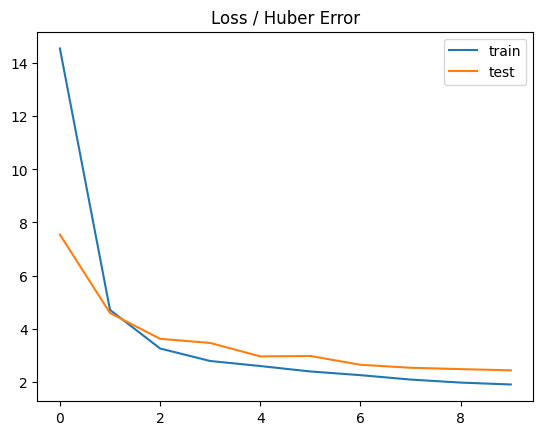

In [ ]:
# plot loss during training
plt.title('Loss / Huber Error')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()


### Conclusion
These loss functions are selected based on the specific characteristics of the data and the training needs:
- **MSE** is great when you have normal data without much noise and outliers.
- **MAE** is robust to outliers and is often used when the distribution of data is unknown.
- **MAPE** is useful for prediction targets that are in relative scales or comparison.
- **Huber** combines the robustness of MAE with the efficiency of MSE for small errors.